In [96]:
#!/usr/bin/env python
# -*-coding:utf-8 -*-
'''
@Env     		:   grizli
@File    		:   ~/emulator/emulator_v0.7/2dprofile_updated.ipynb
@Time    		:   2023/06/30 11:16:06
@Author  		:   Run Wen
@Version 		:   1.0
@Contact 		:   wenrun@pmo.ac.cn
@Description	:   Updated 2d profile fitting and modeling for CSST emulator using galsim and GEMS catalog
'''
import numpy as np
import math
import os
from tqdm import tqdm
import h5py
import pysynphot as S
from multiprocessing import Process
from astropy.io import fits
import time
from astropy.convolution import Gaussian1DKernel,convolve
from astropy.modeling.models import Sersic2D
import matplotlib
import matplotlib.pyplot as plt
import galsim
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
hubble=70
cosmo = FlatLambdaCDM(H0=hubble,Om0=0.3)

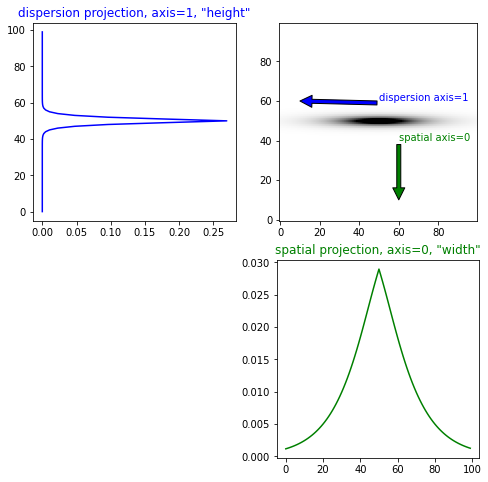

In [97]:
import numpy as np
from astropy.modeling.models import Sersic2D
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 8]

re = 20
pa = np.pi
sersic = 1
baratio = 0.1
fig, ax = plt.subplots(nrows=2, ncols=2)

x,y = np.meshgrid(np.arange(np.round(5*re)), np.arange(np.round(5*re)))
mod = Sersic2D(x_0=5*re/2,y_0=5*re/2, amplitude = 1, r_eff = re, n = sersic, ellip = (1-baratio), theta=pa)
img = mod(x, y)
ax[0,1].imshow(img,origin='lower',cmap='gray_r',vmin=0,vmax=2)

width = img.sum(axis=0)
height = img.sum(axis=1)
x1 = np.arange(0,len(width),1)
x2 = np.arange(0,len(height),1)
frac = img[0][0]/img.sum()
widthfunc = width/width.sum()
heightfunc = height/height.sum()
ax[0,0].plot(heightfunc,x2,c='b') #axis=1, dispersion projection, in blue, stands for height
ax[0,0].set_title('dispersion projection, axis=1, "height"',c='blue')
ax[1,1].plot(x1, widthfunc,c='g') #axis=0, spatial projection, in green, stands for length(width)
ax[1,1].set_title('spatial projection, axis=0, "width"',c='green')
ax[1,0].axis('off')
ax[0,1].annotate('dispersion axis=1', xy=(10, 60), xytext=(50, 60), c='blue',
             arrowprops=dict(facecolor='blue', shrink=0.00))
ax[0,1].annotate('spatial axis=0', xy=(60, 10), xytext=(60, 40), c='green',
             arrowprops=dict(facecolor='green', shrink=0.00))
plt.show()

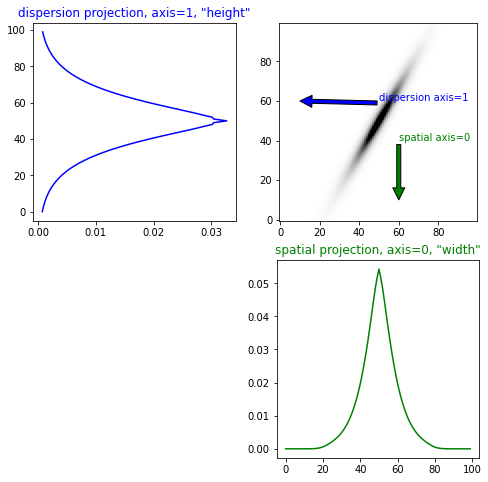

In [90]:
import numpy as np
from astropy.modeling.models import Sersic2D
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 8]

re = 20
pa = np.pi/3
sersic = 1
baratio = 0.1
fig, ax = plt.subplots(nrows=2, ncols=2)

x,y = np.meshgrid(np.arange(np.round(5*re)), np.arange(np.round(5*re)))
mod = Sersic2D(x_0=5*re/2,y_0=5*re/2, amplitude = 1, r_eff = re, n = sersic, ellip = (1-baratio), theta=pa)
img = mod(x, y)
ax[0,1].imshow(img,origin='lower',cmap='gray_r',vmin=0,vmax=2)

width = img.sum(axis=0)
height = img.sum(axis=1)
x1 = np.arange(0,len(width),1)
x2 = np.arange(0,len(height),1)
frac = img[0][0]/img.sum()
widthfunc = width/width.sum()
heightfunc = height/height.sum()
ax[0,0].plot(heightfunc,x2,c='b') #axis=1, dispersion projection, in blue, stands for height
ax[0,0].set_title('dispersion projection, axis=1, "height"',c='blue')
ax[1,1].plot(x1, widthfunc,c='g') #axis=0, spatial projection, in green, stands for length(width)
ax[1,1].set_title('spatial projection, axis=0, "width"',c='green')
ax[1,0].axis('off')
ax[0,1].annotate('dispersion axis=1', xy=(10, 60), xytext=(50, 60), c='blue',
             arrowprops=dict(facecolor='blue', shrink=0.00))
ax[0,1].annotate('spatial axis=0', xy=(60, 10), xytext=(60, 40), c='green',
             arrowprops=dict(facecolor='green', shrink=0.00))
plt.show()

In [99]:
gupixlen = 317
gvpixlen = 342
gipixlen = 332
c = 2.9979e8 # m/s
c_aa = 2.9979e18 #AA/s
h = 6.626e-27 # erg*s
radi = 100 # cm
gures = 241 #resolution of grism
gvres = 263 
gires = 270
expt = 150 # exposure time
expnum = 4 # exposure number
colarea = np.pi*radi**2 # cm^2
arcperpix = 0.074 # arcsec/pixel

(0.3, 20)

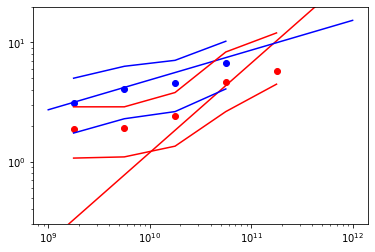

In [232]:
M_star = np.logspace(9, 12)

plt.loglog(M_star,10**0.6*(M_star/(5e10))**0.75,c='r')
plt.loglog(M_star,10**0.86*(M_star/(5e10))**0.25,c='b')

plt.plot([10**9.25,10**9.75,10**10.25,10**10.75,10**11.25],[10**0.03,10**0.04,10**0.13,10**0.42,10**0.65],c='r')
plt.scatter([10**9.25,10**9.75,10**10.25,10**10.75,10**11.25],[10**0.27,10**0.28,10**0.38,10**0.67,10**0.76],c='r')
plt.plot([10**9.25,10**9.75,10**10.25,10**10.75,10**11.25],[10**0.46,10**0.46,10**0.58,10**0.92,10**1.08],c='r')

plt.plot([10**9.25,10**9.75,10**10.25,10**10.75],[10**0.24,10**0.36,10**0.42,10**0.61],c='b')
plt.scatter([10**9.25,10**9.75,10**10.25,10**10.75],[10**0.49,10**0.61,10**0.66,10**0.83],c='b')
plt.plot([10**9.25,10**9.75,10**10.25,10**10.75],[10**0.70,10**0.80,10**0.85,10**1.01],c='b')
# plt.scatter(M_star,0.6*(M_star/(5e10))**0.75+np.random.uniform())
plt.ylim(0.3,20)

In [100]:
gems_cat = fits.open('/Users/rain/emulator/gems_cat.fits')
mask = gems_cat[1].data['SCIENCE_FLAG'] == 1 
gemsmag = gems_cat[1].data['FIT_MAG'][mask]
gemsn = gems_cat[1].data['FIT_N'][mask]
gemsar = gems_cat[1].data['FIT_AR'][mask]

# Data from van der Wel+2014 Table 2 and Figure 8

Mstar = np.array([9.25, 9.75, 10.25, 10.75, 11.25])

et_z_025_lower = np.array([10**0.03, 10**0.04, 10**0.13, 10**0.42, 10**0.65])
et_z_025_median = np.array([10**0.27, 10**0.28, 10**0.38, 10**0.67, 10**0.76])
et_z_025_upper = np.array([10**0.46, 10**0.46, 10**0.58, 10**0.92, 10**1.08])

lt_z_025_lower = np.array([10**0.24, 10**0.36, 10**0.42, 10**0.61, 10**0.74])
lt_z_025_median = np.array([10**0.49, 10**0.61, 10**0.66, 10**0.83, 10**0.99])
lt_z_025_upper = np.array([10**0.70, 10**0.80, 10**0.85, 10**1.01, 10**1.06])

et_z_075_lower = np.array([10**-0.02, 10**-0.14, 10**0.02, 10**0.26, 10**0.62])
et_z_075_median = np.array([10**0.23, 10**0.21, 10**0.23, 10**0.45, 10**0.81])    
et_z_075_upper = np.array([10**0.43, 10**0.44, 10**0.42, 10**0.64, 10**0.97])

lt_z_075_lower = np.array([10**0.18, 10**0.32, 10**0.39, 10**0.51, 10**0.77])
lt_z_075_median = np.array([10**0.43, 10**0.56, 10**0.64, 10**0.75, 10**0.90])    
lt_z_075_upper = np.array([10**0.65, 10**0.76, 10**0.83, 10**0.90, 10**1.12])

def get_n_from_mag(mag, magmin, magmax, deltamag, nmax):
    """ 
    Get Sersic index with a given mag from GEMS catalog, the magnitudes are divided into slices and in each slice
    the probabilities of the n is calculated to give the final sersic index.

    parameters:
    ----------
    mag - input mag
    magmin, magmax, deltamag - determine the mag slices in GEMS
    nmax - the max Sersic index for those with no data slice

    return:
    ------
    n - Sersic index of the input mag based on the probability distribution
    """

    # 定义mag的slices
    bins = np.arange(round(magmin), round(magmax)+deltamag, deltamag)

    # 使用digitize函数将mag数据划分为多个slices
    indices = np.digitize(gemsmag, bins)
    n_values=[]
    # 获取每个mag slice对应的n值
    for i in range(1, len(bins)+1):
        n_values.append(gemsn[indices == i])
    # jugde whether the slices contains 
    if len(n_values[(np.abs(bins-mag)).argmin()]) == 0:
        n = (np.random.uniform(nmax))

    elif len(n_values[(np.abs(bins-mag)).argmin()]) != 0:
        unique, counts = np.unique(n_values[(np.abs(bins-mag)).argmin()], return_counts=True)
        probabilities = counts / len(n_values[(np.abs(bins-mag)).argmin()])
        n = (np.random.choice(unique, p=probabilities))
    if n > nmax:
        n = (np.random.uniform(nmax))
    return n

(array([3447., 5880., 2632., 2872., 1993., 2022., 2221., 1465.,  791.,
         468.]),
 array([0.34999999, 1.11499999, 1.88      , 2.645     , 3.41      ,
        4.175     , 4.94      , 5.705     , 6.47      , 7.235     ,
        8.        ]),
 <BarContainer object of 10 artists>)

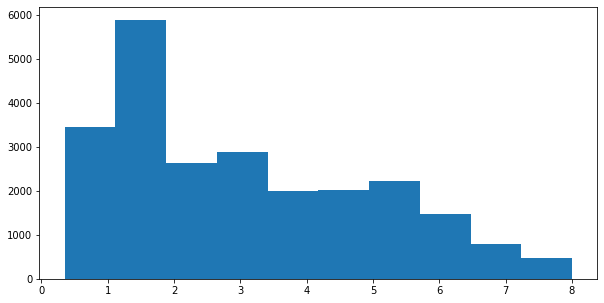

In [1115]:
plt.hist(n_test)

(array([1315., 4051., 3906., 2612., 1902., 2199., 2000., 1995., 1843.,
        1968.]),
 array([0.34999999, 0.81499999, 1.28      , 1.745     , 2.21      ,
        2.675     , 3.14      , 3.605     , 4.07      , 4.535     ,
        5.        ]),
 <BarContainer object of 10 artists>)

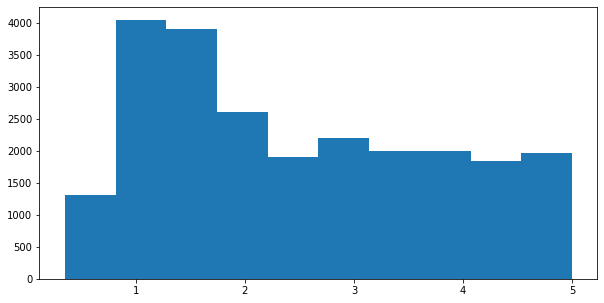

In [1121]:
plt.hist(n_test)

In [1136]:
magmin = min(file['parameters'][:,8])
magmax = max(file['parameters'][:,8])
deltamag = 0.1
nmax = 5
# mag = file['parameters'][:,8]
for mag in file['parameters'][:,8]:
    bins = np.arange(16, 21+deltamag, deltamag)

    # 使用digitize函数将mag数据划分为多个slices
    indices = np.digitize(gemsmag, bins)
    n_values=[]
    # 获取每个mag slice对应的n值
    for i in range(1, len(bins)):
        n_values.append(gemsn[indices == i])
    # jugde whether the slices contains 
    if len(n_values[(np.abs(bins-mag)).argmin()]) == 0:
        n = (np.random.uniform(nmax))

    elif len(n_values[(np.abs(bins-mag)).argmin()]) != 0:
        unique, counts = np.unique(n_values[(np.abs(bins-mag)).argmin()], return_counts=True)
        probabilities = counts / len(n_values[(np.abs(bins-mag)).argmin()])
        n = (np.random.choice(unique, p=probabilities))
    if n > nmax:
        n =  (np.random.uniform(nmax))

In [1141]:
probabilities

array([0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.07142857,
       0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.07142857,
       0.07142857, 0.07142857, 0.07142857, 0.07142857])

In [1142]:
(np.abs(bins-mag))

array([2.5248, 2.4248, 2.3248, 2.2248, 2.1248, 2.0248, 1.9248, 1.8248,
       1.7248, 1.6248, 1.5248, 1.4248, 1.3248, 1.2248, 1.1248, 1.0248,
       0.9248, 0.8248, 0.7248, 0.6248, 0.5248, 0.4248, 0.3248, 0.2248,
       0.1248, 0.0248, 0.0752, 0.1752, 0.2752, 0.3752, 0.4752, 0.5752,
       0.6752, 0.7752, 0.8752, 0.9752, 1.0752, 1.1752, 1.2752, 1.3752,
       1.4752, 1.5752, 1.6752, 1.7752, 1.8752, 1.9752, 2.0752, 2.1752,
       2.2752, 2.3752, 2.4752, 2.5752])

In [1143]:
n_values[(np.abs(bins-mag)).argmin()]

array([2.5 , 4.  , 0.76, 1.16, 0.86, 2.79, 3.69, 1.4 , 2.01, 1.66, 4.8 ,
       1.05, 6.7 , 1.59], dtype=float32)

In [101]:
def get_re_from_nzm(mag, magmin, magmax, deltamag, nmax, mstar, z):
    """ 
    Get Sersic index with a given mag from GEMS catalog, the magnitudes are divided into slices and in each slice
    the probabilities of the n is calculated to give the final sersic index.

    parameters:
    ----------
    mag - input mag
    magmin, magmax, deltamag - determine the mag slices in GEMS
    nmax - the max Sersic index for those with no data slice
    mstar - stellar mass of the galaxy
    z - redshift of the galaxy

    return:
    ------
    re - effective radius of the galaxy in pix
    """

    # get sersic index
    n = get_n_from_mag(mag, magmin, magmax, deltamag, nmax)

    # late-type
    idx = (np.abs(Mstar-mstar)).argmin()
    if n < 2.5:
        if z < 0.5:
            # get Re in kpc following the mass-size relation of van der Wel+14
            re_kpc = np.random.normal(lt_z_025_median[idx],(lt_z_025_upper[idx]-lt_z_025_lower[idx])/2)
            # get redshift evolution scale in pixel/kpc
            zscale = 60/cosmo.kpc_proper_per_arcmin(z).value/arcperpix
            re = re_kpc * zscale
        if z >= 0.5:
            re_kpc = np.random.normal(lt_z_075_median[idx],(lt_z_075_upper[idx]-lt_z_075_lower[idx])/2)
            zscale = 60/cosmo.kpc_proper_per_arcmin(z).value/arcperpix
            re = re_kpc * zscale

    # early-type
    if n >= 2.5:
        if z < 0.5:
            re_kpc = np.random.normal(et_z_025_median[idx],(et_z_025_upper[idx]-et_z_025_lower[idx])/2)
            zscale = 60/cosmo.kpc_proper_per_arcmin(z).value/arcperpix
            re = re_kpc * zscale
        if z >= 0.5:
            re_kpc = np.random.normal(et_z_075_median[idx],(et_z_075_upper[idx]-et_z_075_lower[idx])/2)
            zscale = 60/cosmo.kpc_proper_per_arcmin(z).value/arcperpix
            re = re_kpc * zscale
    if re <= 0.3/0.074:
        re = 4
    return round(re) # in pix

def extraction_height(height,fluxratio):
    tFlux = np.sum(height)
    y_cent_pos = int((height.shape[0]-1)/2)
    for istop in range(y_cent_pos):
        pFlux = np.sum(height[y_cent_pos-istop:y_cent_pos+istop+1])
        fluxRatio = pFlux/tFlux
        if fluxRatio>fluxratio:
            break
    return height[y_cent_pos-istop+1:y_cent_pos+istop+2]

In [102]:
def get_pa():
    return np.random.randint(91)
def get_ar():

    unique, counts = np.unique(gemsar, return_counts=True)
    probabilities = counts / len(gemsar)
    ar = np.random.choice(unique, p=probabilities)
    if ar > 0.9:
        ar = 0.9
    return ar
def gaussian(length, std):
    """ 
    A simple 1D gaussian kernel generator

    parameters
    ----------
    length: the size of this gaussian kernel
    std: standard deviation of the gaussian kernel
    
    return
    ------
    y: normalized 1D gaussian kernel with size of 2*length+1
    """
    size = np.arange(-length,length+1,1)
    y = np.exp(-np.power(size , 2.) / (2 * np.power(std, 2.)))
    return y/sum(y)

In [104]:
file1 = h5py.File('/Users/rain/emulator/seedcat_0702/seedcat2_0702_0_DECaLS_0csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8_10.hdf5','r')
file2 = h5py.File('/Users/rain/emulator/seedcat_0702/seedcat2_0702_0_MzLS_0csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8_10.hdf5','r')

In [105]:
ntest = []
retest = []
patest = []
artest = []
from tqdm import tqdm
for i in tqdm(range(len(file1['ID'][:]))):
    ntest.append(get_n_from_mag(file1['parameters'][i,8],16,25.1,0.1,5))
    retest.append(get_re_from_nzm(file1['parameters'][i,8],16,25.1,0.1,5,10**file1['parameters'][i,115],file1['parameters'][i,31]))
    patest.append(get_pa())
    artest.append(get_ar())

100%|██████████| 23791/23791 [03:47<00:00, 104.58it/s]


In [106]:
get_n_from_mag(15,16,25.1,0.1,5)

3.350706968009397

(array([   0.,    0.,    0.,    7.,   25.,  205.,  250.,  549.,  684.,
         736.,  832., 1113., 1170., 1226.,  760.,  757.,  676.,  849.,
         492.,  418.,  671.,  456.,  407.,  385.,  538.,  411.,  365.,
         633.,  177.,  566.,  603.,  482.,  391.,  620.,  220.,  360.,
         479.,  353.,  525.,  234.,  525.,  349.,  270.,  353.,  419.,
         462.,  329.,  243.,  641.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
 <BarContainer object of 49 artists>)

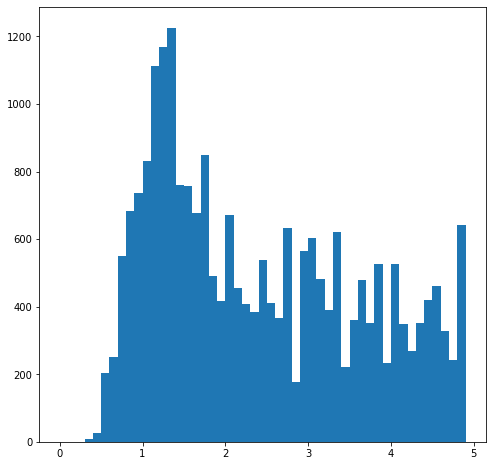

In [107]:
plt.hist(ntest,bins=np.arange(0,5,0.1))

(array([   0.,    0., 1662.,  758., 1012., 1205., 1333., 1321., 1398.,
        1282., 1297., 1166., 1127., 1006.,  977.,  883.,  825.,  786.,
         618.,  514.,  470.,  429.,  387.,  301.,  297.,  274.,  233.,
         199.,  180.,  144.,  174.,  123.,  131.,   89.,   80.,   79.,
          71.,   68.,   54.,   64.,   41.,   38.,   50.,   45.,   37.,
          33.,   46.,   23.,   39.]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
        68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]),
 <BarContainer object of 49 artists>)

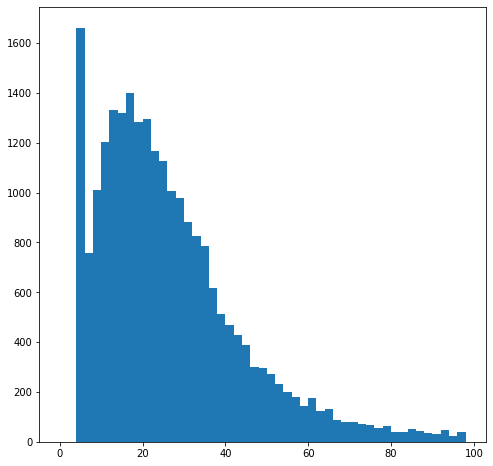

In [108]:
plt.hist(retest,bins=np.arange(0,100,2))

(array([ 809.,  773.,  743.,  769.,  809.,  728.,  834.,  755.,  785.,
         742.,  808.,  791.,  793.,  796.,  838.,  820.,  793.,  765.,
         759.,  773.,  802.,  792.,  791.,  779.,  760.,  809.,  772.,
         769., 1054.]),
 array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48,
        51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87]),
 <BarContainer object of 29 artists>)

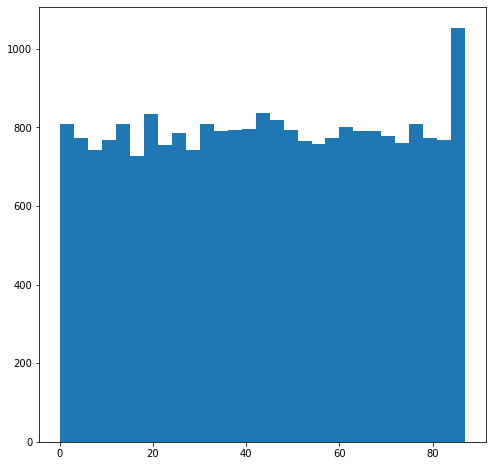

In [109]:
plt.hist(patest,bins=np.arange(0,90,3))

(array([  39.,  916., 2736., 3846., 4015., 3705., 3148., 2699., 2687.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 <BarContainer object of 9 artists>)

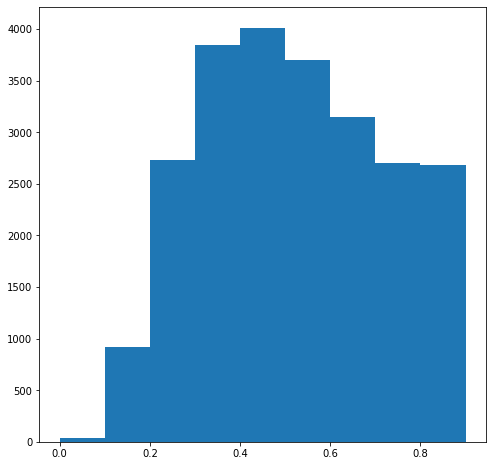

In [110]:
plt.hist(artest,bins=np.arange(0,1,0.1))

In [403]:
width = []
height = []
for i in tqdm(range(len(file1['ID'][:]))):
    widthfunc, heightfunc = get_2d_profile(ntest[i],retest[i],patest[i],artest[i])
    width.append(widthfunc)
    height.append(heightfunc)


100%|██████████| 23791/23791 [17:43<00:00, 22.38it/s]


In [7]:
nseries = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ,1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2. ,
                   2.5, 3., 3.5, 4., 4.5, 5.]) # 20
reseries = np.array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 
                     2, 2.5, 3, 3.5, 4.5, 5])/0.074 # 20
paseries = np.array([0, np.pi/18, np.pi/9, np.pi/6, 2*np.pi/9, 5*np.pi/18, np.pi/3, 
                     7*np.pi/18, 4*np.pi/9, np.pi/2]) # 10
baseries = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]) # 10

In [12]:
nseries = np.array([0.5, 1, 1.5, 2. ,
                   2.5, 3., 3.5, 4., 4.5 , 5]) # 10
reseries = np.array([0.3, 0.5, 0.8, 1, 1.2, 1.5, 
                     2, 2.5, 3, 4])/0.074 # 10
paseries = np.array([0, np.pi/18, np.pi/9, np.pi/6, 2*np.pi/9, 5*np.pi/18, np.pi/3, 
                     7*np.pi/18, 4*np.pi/9, np.pi/2])*180/np.pi # 10
baseries = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]) # 10

In [15]:
import morphology
widthlib, heightlib = morphology.create_lib(nseries=nseries,reseries=reseries,paseries=paseries,baseries=baseries)

100%|██████████| 10/10 [13:35<00:00, 81.50s/it] 


In [14]:
paseries

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [16]:
import pickle
# 将矩阵序列化并存储为文件
with open('widthlib.pkl', 'wb') as f:
    pickle.dump(widthlib, f)
# 将矩阵序列化并存储为文件
with open('heightlib.pkl', 'wb') as f:
    pickle.dump(heightlib, f)


In [9]:
# 重新加载矩阵
with open('heightlib.pkl', 'rb') as f:
    loaded_arr = pickle.load(f)

In [405]:
lenwidth = []
lenheight = []
for i in range(len(width)):
    lenwidth.append(len(width[i]))
    lenheight.append(len(height[i]))

(array([ 209., 1439., 2738., 5137., 5078., 3760., 2042., 1084.,  721.,
         503.,  312.,  203.,  170.,  138.,  124.,  111.,   22.]),
 array([ 4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36,
        38]),
 <BarContainer object of 17 artists>)

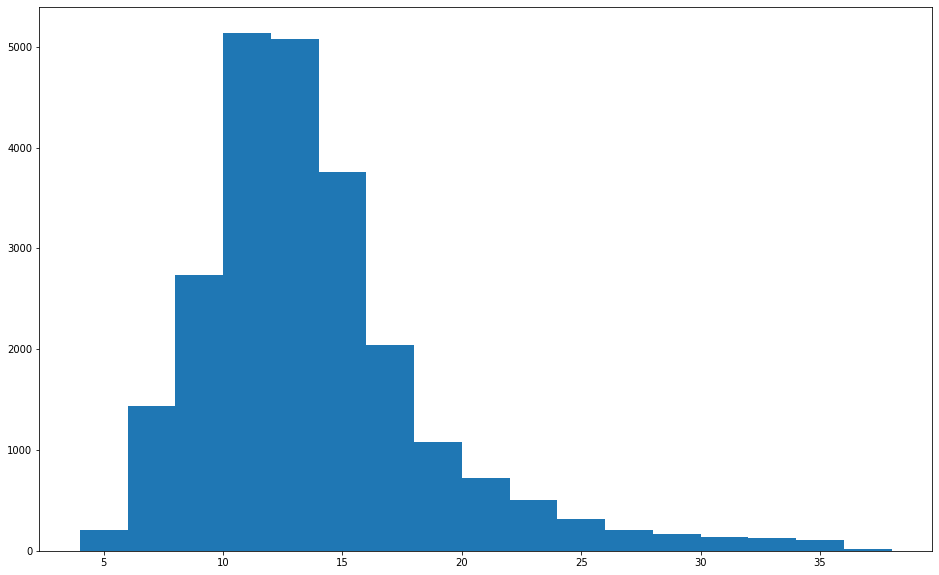

In [803]:
plt.hist(lenwidth,bins=np.arange(4,40,2))

(array([ 209., 1457., 2707., 5145., 5051., 3781., 2008., 1162.,  725.,
         472.,  298.,  221.,  166.,  149.,  108.,  116.,   16.]),
 array([ 4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36,
        38]),
 <BarContainer object of 17 artists>)

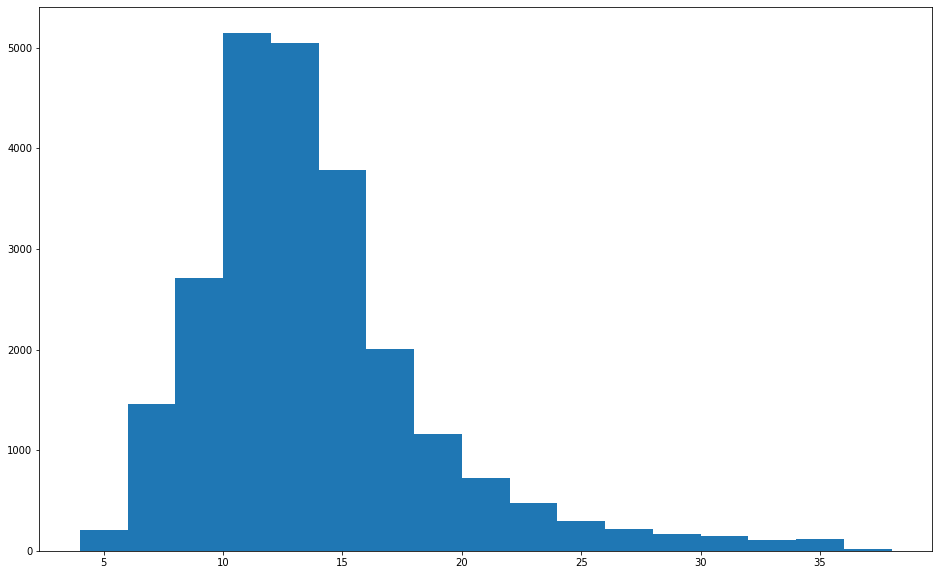

In [411]:
plt.hist(lenheight,bins=np.arange(4,40,2))

In [866]:
def get_2d_profile(n,re,pa,ar):
    fluxlimit = 0.8
    if round(n) == 5:
        fluxlimit = 0.4
        if round(re) > 30:
            re = 30
    if round(n) == 4:
        fluxlimit = 0.5
        if round(re) > 40:
            re = 40
    elif round(n) == 3:
        fluxlimit = 0.6
        if round(re) > 60:
            re = 60
    elif round(n) == 2:
        fluxlimit = 0.7
        if round(re) > 80:
            re = 80
    elif round(n) == 1:
        fluxlimit = 0.8
        if round(re) > 100:
            re = 100

    xcenter = 300
    ycenter = 300
    x_nominal = int(np.floor(xcenter + 0.5))
    y_nominal = int(np.floor(ycenter + 0.5))
    dx = xcenter - x_nominal+0.5
    dy = ycenter - y_nominal+0.5
    offset = galsim.PositionD(dx, dy)

    gal = galsim.Sersic(n, half_light_radius=0.074*re)
    gal_pa = pa * galsim.degrees
    gal_ell = gal.shear(q=(1-ar), beta=gal_pa)
    psf = galsim.Gaussian(fwhm=0.3)
    conv_gal = galsim.Convolve([gal_ell,psf])
    stamp = conv_gal.drawImage(wcs=galsim.PixelScale(0.074), offset=offset) * expt * expnum * math.pi * (radi/100)**2
        
    width = stamp.array.sum(axis=0)
    height = stamp.array.sum(axis=1)
    widthfunc = extraction_height(width/width.sum(),fluxlimit)
    heightfunc = extraction_height(height/height.sum(),fluxlimit)

    if len(widthfunc)>40:
        widthfunc = gaussian(20,7)
    if len(heightfunc)>100:
        heightfunc = gaussian(50,15)
    return widthfunc, heightfunc

def create_lib(nseries,reseries,paseries,baseries):
    wfn=[]
    hfn=[]
    for i in tqdm(nseries):
        for j in reseries:
            for k in paseries:
                for l in baseries:
                    widthwf, heightwf = get_2d_profile(i,j,k,l)
                    wfn.append(widthwf)
                    hfn.append(heightwf)
    wfn = np.array(wfn,dtype=object)
    hfn = np.array(hfn,dtype=object)
    a = np.reshape(wfn, (len(nseries),len(reseries),len(paseries),len(baseries)))
    b = np.reshape(hfn, (len(nseries),len(reseries),len(paseries),len(baseries)))
    return a,b 

def find_nearest(array, value):
    '''
    Utility function to find array element closest to input value
    
    Args:
        array: array in which you want to find the value
        value: value you want to find in the array
        
    Returns:
        Index of the array containing the element closest to input value
    '''
    array = array[np.isfinite(array)]
    idx = (np.abs(array-value)).argmin()
    return idx
def match_input_paramters(lib,n,re,pa,ar):
    '''
    parameters:
    ----------
    lib - 2d profile library created by 'create_lib'
    sersic - sersic index of the galaxy
    re - effective radius of the galaxy
    pa - position angle of the galaxy
    baratio - b/a ratio of the galaxy

    return:
    ------
    lib[nidx][reidx][paidx][baidx] - the matched parameters in lib
    '''
    nidx = find_nearest(nseries,n)
    reidx = find_nearest(reseries,re)
    paidx = find_nearest(paseries,pa)
    baidx = find_nearest(baseries,ar)
    return lib[nidx][reidx][paidx][baidx]

In [867]:
wfn, hfn = create_lib(nseries,reseries,paseries,baseries)

100%|██████████| 20/20 [27:57<00:00, 83.87s/it] 


(array([1532., 2158., 3390., 3491., 2991., 2405., 1983., 1508., 1050.,
         717.,  547.,  400.,  324.,  257.,  170.,  159.,   98.,   83.,
          93.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85, 90, 95]),
 <BarContainer object of 19 artists>)

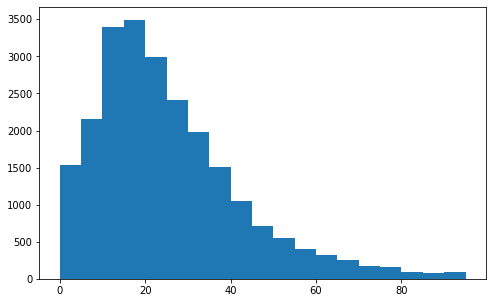

In [935]:
matplotlib.rcParams['figure.figsize'] = [8, 5]
plt.hist(retest,bins=np.arange(0,100,5))

(array([1190., 4429., 5705., 4143., 2385., 1234., 1138., 1185., 1376.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 <BarContainer object of 9 artists>)

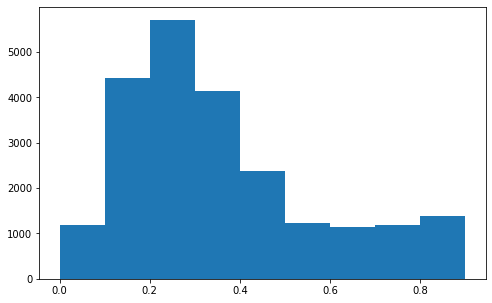

In [936]:
matplotlib.rcParams['figure.figsize'] = [8, 5]
plt.hist(file1['best_fit']['z'],bins=np.arange(0,1,0.1))

2916
2.72 12 88 0.863


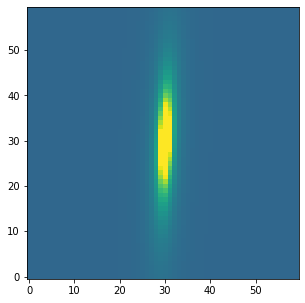

In [1030]:
idx = np.random.randint(len(file1['ID'][:])) #9221 6708 19321 1253 3254
print(idx) 
print(ntest[idx],retest[idx],patest[idx],artest[idx])
x,y = np.meshgrid(np.arange(np.round(5*retest[idx])), np.arange(np.round(5*retest[idx])))
mod = Sersic2D(x_0=5*retest[idx]/2,y_0=5*retest[idx]/2,amplitude = 1, r_eff = retest[idx], n = ntest[idx], theta=patest[idx]*np.pi/180, ellip = artest[idx])
img = mod(x, y)
matplotlib.rcParams['figure.figsize'] = [5, 5]

plt.imshow(img,origin='lower',vmin=-1,vmax=2)

23152
1.87 15 72 0.643


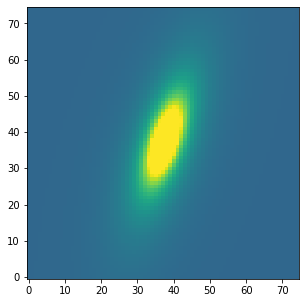

In [1009]:
idx = np.random.randint(len(file1['ID'][:])) #9221 6708 19321 1253
print(idx)
print(ntest[idx],retest[idx],patest[idx],artest[idx])
x,y = np.meshgrid(np.arange(np.round(5*retest[idx])), np.arange(np.round(5*retest[idx])))
mod = Sersic2D(x_0=5*retest[idx]/2,y_0=5*retest[idx]/2,amplitude = 1, r_eff = retest[idx], n = ntest[idx], theta=patest[idx]*np.pi/180, ellip = artest[idx])
img = mod(x, y)
matplotlib.rcParams['figure.figsize'] = [5, 5]

plt.imshow(img,origin='lower',vmin=-1,vmax=2)

Text(0.5, 1.0, 'height,dispersion,axis=1')

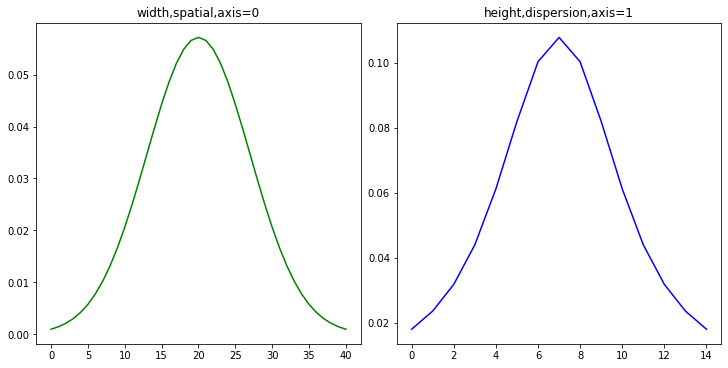

In [1032]:
matplotlib.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots(ncols=2, nrows=1, layout='constrained')
ax[0].plot(match_input_paramters(wfn, ntest[idx],retest[idx],patest[idx],artest[idx]),c='g')
ax[1].plot(match_input_paramters(hfn,ntest[idx],retest[idx],patest[idx],artest[idx]),c='b')
ax[0].set_title('width,spatial,axis=0')
ax[1].set_title('height,dispersion,axis=1')

1884.7131


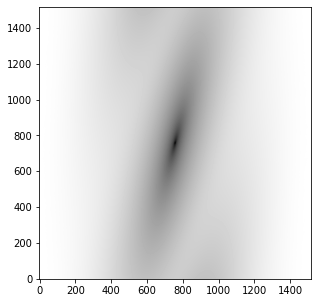

In [996]:
xcenter = 300
ycenter = 300
x_nominal = int(np.floor(xcenter + 0.5))
y_nominal = int(np.floor(ycenter + 0.5))
dx = xcenter - x_nominal+0.5
dy = ycenter - y_nominal+0.5
offset = galsim.PositionD(dx, dy)

gal = galsim.Sersic(ntest[idx], half_light_radius=0.074*retest[idx])

gal_pa = patest[idx] * galsim.degrees
gal_ell = gal.shear(q=(1-artest[idx]), beta=gal_pa)
psf = galsim.Gaussian(fwhm=0.3)
conv_gal = galsim.Convolve([gal_ell,psf])


stamp = conv_gal.drawImage(wcs=galsim.PixelScale(0.074), offset=offset) * expt * expnum * math.pi*(2/2)*(2/2)
stamp.setOrigin(0,0)
origin_star = [y_nominal - (stamp.center.y - stamp.ymin),
                        x_nominal - (stamp.center.x - stamp.xmin)]
plt.imshow(np.log10(stamp.array),cmap='gray_r',origin='lower') 
print(stamp.array.sum())

17
23


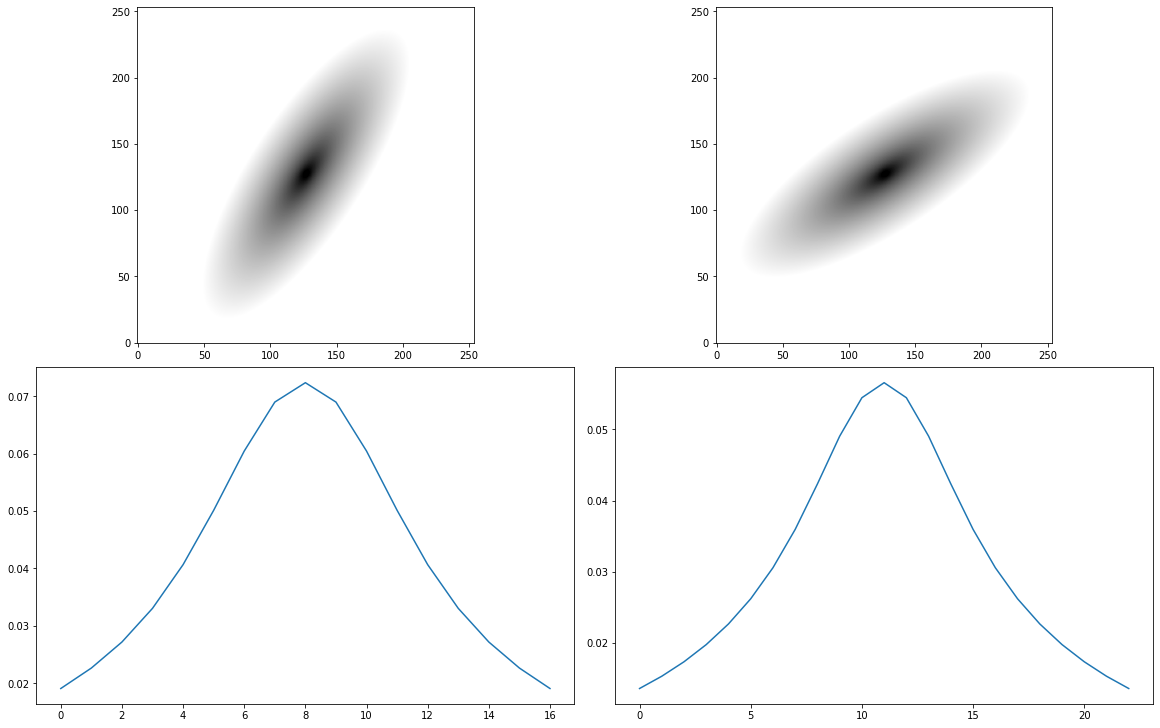

In [865]:
width = stamp.array.sum(axis=0)
height = stamp.array.sum(axis=1)

widthfunc = extraction_height(width/width.sum(),0.7)
heightfunc = extraction_height(height/height.sum(),0.7)

matplotlib.rcParams['figure.figsize'] = [16, 10]

fig, ax = plt.subplots(ncols=2, nrows=2, layout='constrained')

ax[0][0].imshow(np.log10(stamp.array),origin='lower',cmap='gray_r',vmin=-3,vmax=1)
ax[0][1].imshow(np.log10(stamp.array.T),origin='lower',cmap='gray_r',vmin=-3,vmax=1)
ax[1][0].plot(widthfunc)
ax[1][1].plot(heightfunc)
print(len(widthfunc))
print(len(heightfunc))

/Users/rain/miniconda3/envs/grizli/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10


1882.9102


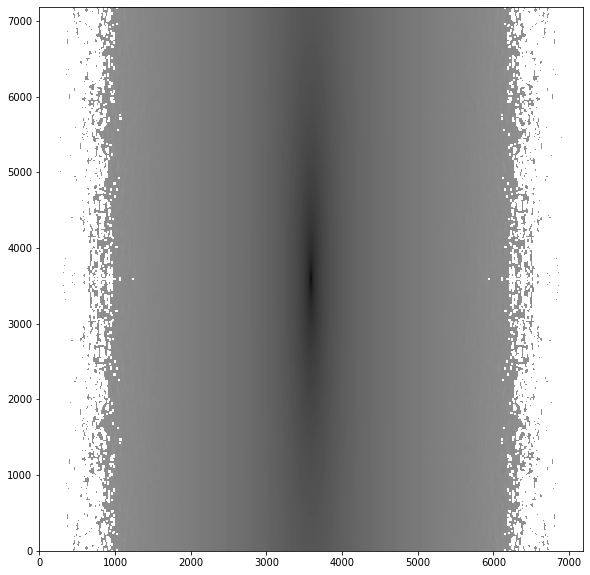

In [659]:
n=5
re=30
pa=90
ar=0.9
xcenter = 300
ycenter = 300
x_nominal = int(np.floor(xcenter + 0.5))
y_nominal = int(np.floor(ycenter + 0.5))
dx = xcenter - x_nominal+0.5
dy = ycenter - y_nominal+0.5
offset = galsim.PositionD(dx, dy)

gal = galsim.Sersic(n, half_light_radius=0.074*re)

gal_pa = pa * galsim.degrees
gal_ell = gal.shear(q=(1-ar), beta=gal_pa)
psf = galsim.Gaussian(fwhm=0.3)
conv_gal = galsim.Convolve([gal_ell,psf])


stamp = conv_gal.drawImage(wcs=galsim.PixelScale(0.074), offset=offset) * expt * expnum * math.pi*(2/2)*(2/2)
stamp.setOrigin(0,0)
origin_star = [y_nominal - (stamp.center.y - stamp.ymin),
                        x_nominal - (stamp.center.x - stamp.xmin)]
plt.imshow(np.log10(stamp.array),cmap='gray_r',origin='lower') 
print(stamp.array.sum())

/Users/rain/miniconda3/envs/grizli/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/Users/rain/miniconda3/envs/grizli/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':


11
101


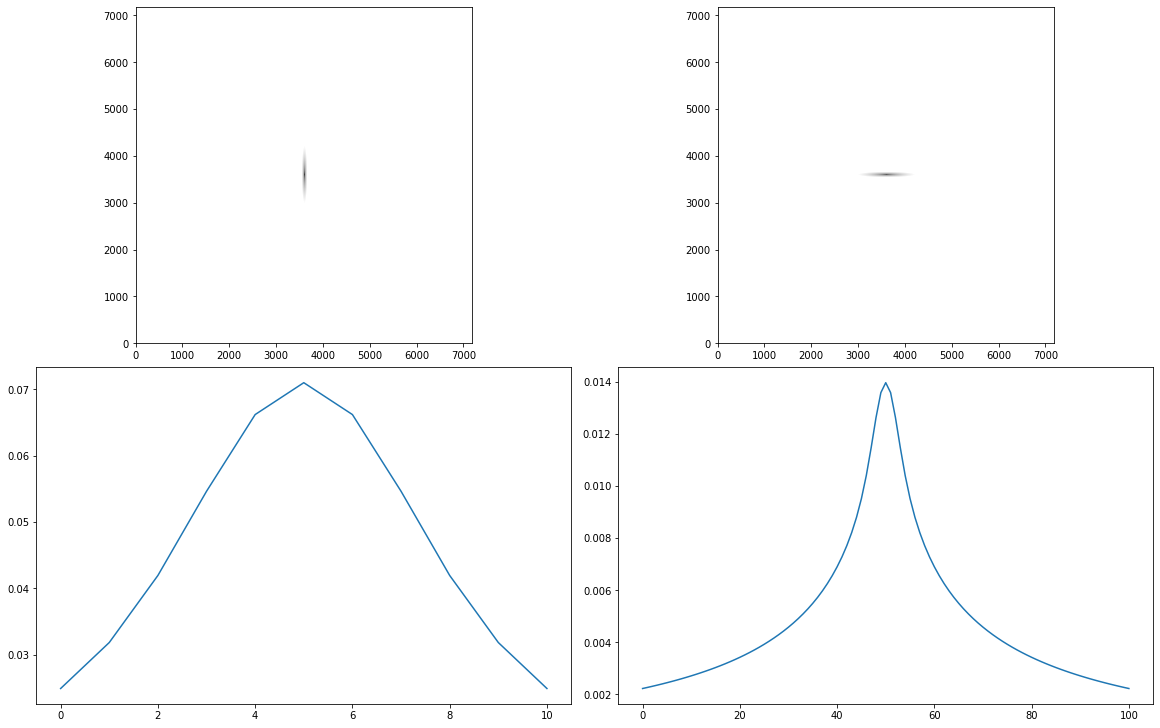

In [660]:
width = stamp.array.sum(axis=0)
height = stamp.array.sum(axis=1)

widthfunc = extraction_height(width/width.sum(),0.5)
heightfunc = extraction_height(height/height.sum(),0.5)

matplotlib.rcParams['figure.figsize'] = [16, 10]

fig, ax = plt.subplots(ncols=2, nrows=2, layout='constrained')

ax[0][0].imshow(np.log10(stamp.array),origin='lower',cmap='gray_r',vmin=-3,vmax=1)
ax[0][1].imshow(np.log10(stamp.array.T),origin='lower',cmap='gray_r',vmin=-3,vmax=1)
ax[1][0].plot(widthfunc)
ax[1][1].plot(heightfunc)
print(len(widthfunc))
print(len(heightfunc))